1. mon_standard.pkl > array code



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pickle

USE_SUBLABEL = False
URL_PER_SITE = 10
TOTAL_URLS   = 950

# Load the pickle file
print("Loading datafile...")
with open("/content/drive/MyDrive/Colab Notebooks/mon_standard.pkl", 'rb') as fi: # Path to mon_standard.pkl in Colab
    data = pickle.load(fi)


Loading datafile...


In [4]:

X1 = [] # Array to store instances (timestamps) - 19,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2 = [] # Array to store instances (direction*size) - size information
y = [] # Array to store the site of each instance - 19,000 instances, e.g., [0, 0, 0, 0, 0, 0, ..., 94, 94, 94, 94, 94]

# Differentiate instances and sites, and store them in the respective x and y arrays
# x array (direction*timestamp), y array (site label)
for i in range(TOTAL_URLS):
    if USE_SUBLABEL:
        label = i
    else:
        label = i // URL_PER_SITE # Calculate which site's URL the current URL being processed belongs to and set that value as the label. Thus, URLs fetched from the same site are labeled identically.
    for sample in data[i]:
        size_seq = []
        time_seq = []
        for c in sample:
            dr = 1 if c > 0 else -1
            time_seq.append(abs(c))
            size_seq.append(dr * 512)
        X1.append(time_seq)
        X2.append(size_seq)
        y.append(label)
size = len(y)

print(f'Total samples: {size}') # Output: 19000

Total samples: 19000


# 1. Data analysis

There are 19000 people, and every 200 people visited the same website.<br>
For example, 0th ~ 199th people visited the website 0, and 200th ~ 399th people visited the website 1, and so on.

- number of classes: 95
- number of samples per class: 200
- total number of samples: 19000

# 2. Feature Extraction

### Number of packets (#1~#3)

In [6]:
# 같은 웹사이트를 방문한 200명의 사용자의 평균 패킷 개수

avgTotal = [] # average number of packets per class (both directions)
avgOutgoing = [] # average number of outgoing packets per class
avgIncoming = [] # average number of incoming packets per class

for i in range(95):
  cntTotal = 0
  cntOutgoing = 0
  cntIncoming = 0

  for j in range(200):
    cntTotal += len(X2[200*i + j])
    cntOutgoing += X2[200*i + j].count(512)
    cntIncoming += X2[200*i + j].count(-512)

  avgTotal.append(cntTotal / 200) # take the average of 200 instances of a class
  avgOutgoing.append(cntOutgoing / 200)
  avgIncoming.append(cntIncoming / 200)

print(len(avgTotal))
print(avgTotal)
print(len(avgOutgoing))
print(avgOutgoing)
print(len(avgIncoming))
print(avgIncoming)

95
[4958.825, 2197.18, 4207.33, 4778.23, 1869.59, 3810.215, 3862.5, 1232.43, 2946.24, 5808.365, 4032.53, 6053.56, 1313.055, 4751.57, 3204.455, 1666.875, 3143.385, 5221.195, 1696.3, 8063.97, 1414.805, 6173.07, 7232.95, 1019.905, 3273.795, 996.095, 524.98, 6026.215, 2037.345, 1611.535, 1042.815, 4653.87, 4552.295, 6091.49, 8569.77, 4594.8, 3843.28, 4201.105, 2291.375, 4765.45, 3484.145, 3877.895, 7758.685, 1288.785, 1607.585, 7831.92, 5110.205, 4553.3, 8402.315, 2039.635, 5450.435, 5674.96, 5560.48, 4064.81, 3322.895, 6524.375, 1447.66, 1524.63, 1476.015, 3534.72, 3580.205, 3798.725, 6102.57, 5139.035, 6604.06, 2988.125, 9206.185, 2975.39, 5954.405, 7222.735, 530.805, 6238.395, 5040.495, 9572.77, 7187.115, 269.6, 1997.545, 5919.385, 4553.165, 8256.045, 1789.03, 3311.115, 4014.46, 1871.415, 2989.075, 4334.875, 1354.825, 5292.295, 4222.285, 6608.73, 3707.44, 5128.285, 5303.55, 1686.55, 8915.93]
95
[421.815, 207.69, 257.065, 279.36, 195.545, 394.565, 221.165, 106.18, 249.925, 366.015, 408.5

Text(0, 0.5, 'incoming packet #')

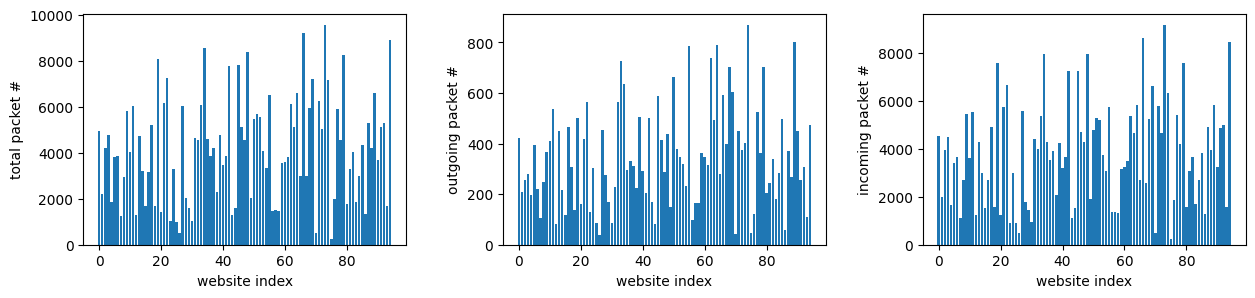

In [8]:
# plot

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,3))
plt.subplots_adjust(wspace=0.3, hspace=0)

plt.subplot(1,3,1)
plt.bar(np.arange(len(avgTotal)),avgTotal)
plt.xlabel("website index")
plt.ylabel("total packet #")

plt.subplot(1,3,2)
plt.bar(np.arange(len(avgOutgoing)),avgOutgoing)
plt.xlabel("website index")
plt.ylabel("outgoing packet #")

plt.subplot(1,3,3)
plt.bar(np.arange(len(avgIncoming)),avgIncoming)
plt.xlabel("website index")
plt.ylabel("incoming packet #")

In [9]:
# 각 사용자의 패킷 개수

total = [] # number of packets (both directions)
outgoing = [] # number of outgoing packets
incoming = [] # number of incoming packets

for i in range(19000):

  total.append(len(X2[i]))
  outgoing.append(X2[i].count(512))
  incoming.append(X2[i].count(-512))

print(total)
print(outgoing)
print(incoming)

[1421, 518, 1358, 1446, 1406, 559, 1376, 1403, 564, 564, 1423, 567, 563, 1443, 1452, 552, 564, 1417, 560, 1178, 629, 5072, 5021, 5221, 1036, 1019, 5183, 1028, 4895, 4950, 5051, 4961, 787, 1016, 5113, 5101, 4948, 1034, 5092, 5028, 4675, 5570, 4696, 4715, 4780, 5723, 4672, 4701, 4743, 4766, 4686, 5545, 4786, 4733, 4296, 5030, 5283, 4978, 4650, 1268, 2230, 2228, 2227, 2219, 2233, 2261, 2245, 1128, 2304, 2253, 2168, 2403, 2316, 2257, 2229, 2366, 2216, 2242, 2242, 2201, 5760, 5657, 5663, 5405, 5649, 7268, 5571, 5803, 3984, 3618, 7522, 5573, 7432, 5640, 7540, 7741, 7457, 5523, 5623, 7892, 9900, 9810, 9840, 9798, 9775, 9813, 4387, 9485, 9755, 9904, 9769, 9864, 2621, 9785, 9771, 9809, 9777, 9767, 9841, 9788, 2499, 1775, 2748, 755, 1953, 2158, 1917, 1978, 2367, 2105, 1886, 1862, 2049, 1888, 2447, 2098, 2095, 1877, 691, 696, 9962, 9961, 9964, 9962, 9962, 9963, 9964, 9963, 9963, 9941, 9963, 9963, 9963, 9964, 9963, 9964, 9962, 9962, 9967, 5556, 1805, 1843, 1902, 1842, 1890, 1948, 1810, 1795, 1849,

### Number of outgoing/incoming packets as a fraction of the total number of packets (#4~#5)

In [10]:
outgoingFraction = [] # number of outgoing packets as a fraction of the total number of packets
incomingFraction = [] # number of incoming packets as a fraction of the total number of packets

for i in range(len(total)):
  outgoingFraction.append(outgoing[i] / total[i])
  incomingFraction.append(incoming[i] / total[i])

print(len(outgoingFraction))
print(outgoingFraction)
print(len(incomingFraction))
print(incomingFraction)

# # plot

# plt.figure(figsize=(10,3))
# plt.subplots_adjust(wspace=0.3, hspace=0)

# plt.subplot(1,2,1)
# plt.bar(np.arange(len(outgoingFraction)),outgoingFraction)
# plt.xlabel("website index")
# plt.ylabel("outgoing / total")

# plt.subplot(1,2,2)
# plt.bar(np.arange(len(incomingFraction)),incomingFraction)
# plt.xlabel("website index")
# plt.ylabel("incoming / total")

19000
[0.08515130190007038, 0.15444015444015444, 0.08689248895434462, 0.08437067773167359, 0.08179231863442389, 0.12164579606440072, 0.08357558139534883, 0.08980755523877405, 0.12411347517730496, 0.13120567375886524, 0.08222066057624737, 0.11816578483245149, 0.1261101243339254, 0.08038808038808039, 0.09366391184573003, 0.12681159420289856, 0.1276595744680851, 0.08115737473535639, 0.12142857142857143, 0.08404074702886248, 0.178060413354531, 0.31624605678233436, 0.3140808603863772, 0.31507374066270827, 0.15733590733590733, 0.1560353287536801, 0.31545437005595217, 0.14202334630350194, 0.2972420837589377, 0.29878787878787877, 0.30231637299544645, 0.3003426728482161, 0.15374841168996187, 0.14960629921259844, 0.3017797770389204, 0.28935502842579885, 0.2991107518189167, 0.16247582205029013, 0.30832678711704636, 0.3124502784407319, 0.09283422459893048, 0.08007181328545782, 0.09518739352640546, 0.09098621420996819, 0.09121338912133892, 0.08090162502184169, 0.0920376712328767, 0.0861518825781748

### the total number of incoming/outgoing packets in the first 30 packets. (#6~#7)

In [11]:
outgoing30 = [] # number of outgoing packets
incoming30 = [] # number of incoming packets

for i in range(19000):
  cntOutgoing30 = 0
  cntIncoming30 = 0

  for j in range(30):
    if X2[i][j] == -512:
      cntOutgoing30 += 1
    else:
      cntIncoming30 += 1

  outgoing30.append(cntOutgoing30)
  incoming30.append(cntIncoming30)

print(len(outgoing30))
print(outgoing30)
print(len(incoming30))
print(incoming30)

19000
[21, 22, 23, 21, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 22, 22, 21, 20, 21, 21, 21, 21, 21, 20, 21, 21, 21, 20, 21, 22, 22, 21, 20, 20, 21, 20, 22, 22, 22, 22, 23, 22, 22, 22, 23, 21, 21, 22, 22, 22, 23, 22, 22, 21, 22, 22, 22, 22, 22, 22, 21, 22, 22, 21, 23, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 22, 21, 21, 22, 23, 22, 23, 23, 23, 22, 21, 22, 23, 22, 22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22, 22, 22, 23, 22, 24, 22, 22, 23, 21, 22, 23, 22, 22, 22, 22, 22, 22, 23, 22, 22, 22, 23, 21, 22, 22, 22, 22, 21, 21, 22, 23, 23, 22, 22, 22, 23, 22, 22, 22, 21, 22, 23, 23, 22, 21, 22, 22, 21, 21, 22, 22, 22, 22, 24, 22, 22, 22, 23, 21, 22, 23, 23, 22, 23, 22, 23, 22, 22, 22, 22, 21, 23, 21, 21, 22, 22, 22, 21, 21, 22, 22, 23, 22, 22, 22, 22, 22, 23, 23, 21, 22, 22, 21, 22, 22, 18, 19, 18, 18, 18, 18, 18, 18, 18, 19, 18, 18, 18, 18, 18, 18, 19, 18, 19, 18, 22, 21, 22, 22, 21, 22, 21, 20, 22, 22, 22, 21, 22, 22, 21, 21, 21, 22, 21, 20, 19, 18, 18, 19, 18, 19, 18, 18, 1

### The sequence of bursts (+ 평균, 표준편차, 최댓값, 최솟값)



In [14]:
# the sequence of bursts
bursts = [[] for i in range(19000)]

for i in range(19000):
  index = 0
  size = X2[i][0] # 512 or -512
  for j in range(1, len(X2[i])):
    if X2[i][j-1] != X2[i][j]: # direction change
      bursts[i].append((j-index)*size)
      index = j
      size = X2[i][j]
  bursts[i].append((len(X2[i])-index)*size)


import numpy as np

bursts_sta = [[] for i in range(19000)]  #순서대로 평균, 표준편차, 최댓값, 최솟값

for i in range(len(bursts)):
  bursts_sta[i].append(np.mean(bursts[i]))
  bursts_sta[i].append(np.std(bursts[i]))
  bursts_sta[i].append(np.max(bursts[i]))
  bursts_sta[i].append(np.min(bursts[i]))

  print(bursts_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[-4658.196078431372, 8413.17421857776, 3072, -26112]
[-5731.90243902439, 9690.938890316444, 5120, -26624]
[-1513.7391304347825, 3257.3973769065246, 3584, -9216]
[-4806.530612244898, 9027.628113247893, 4096, -25600]
[-5120.0, 8792.937359281897, 3072, -27648]
[-5108.869565217391, 9434.466687557859, 5632, -35328]
[-5313.422222222222, 9669.00934024414, 3584, -31232]
[-4383.438596491228, 8372.477935028875, 4096, -27136]
[-5501.023255813953, 9539.160553697931, 4608, -35840]
[-4578.461538461538, 9079.55804257678, 3584, -25600]
[-5097.739130434783, 9292.333320573618, 5120, -26112]
[-4869.446808510638, 9152.155497322512, 3584, -31744]
[-5165.511111111111, 9055.839154004992, 5632, -26624]
[-4828.862745098039, 9425.695520224735, 3584, -25600]
[-4648.156862745098, 7831.334705496358, 6144, -27136]
[-4685.2830188679245, 9195.258491810931, 5120, -25600]
[-5213.090909090909, 8949.20341253948, 6144, -25600]
[-4678.274509803921, 8620.641248334574, 3584, -30720]
[-3719

### Sequence of cumulative packet sizes

In [ ]:
# sequence of cumulative packet sizes
# RAM 초과 에러 발생

cumulative = [[] for i in range(19000)]

for i in range(19000):
  sum = 0
  for j in range(len(X2[i])):
    sum += X2[i][j]
    cumulative[i].append(sum)

print(cumulative[0])
plt.plot(cumulative[0])



```
# 코드로 형식 지정됨
```

### Time interval (both directions, outgoing, incoming)

In [ ]:
# time interval (both directions, outgoing, incoming)
# RAM 초과 에러 발생

interval = [[] for i in range(19000)]

for i in range(19000):
  for j in range(1, len(X1[i])):
    interval[i].append(X1[i][j] - X1[i][j-1])

print(interval[0])

### Number of packets in fixed time (#8) (+ 평균, 표준편차, 최댓값, 최솟값)

In [13]:
#1초 간격
time_interval = 1.0
packets_in_fixed_time = [[] for i in range(19000)]

for i in range(19000):
  start_time = X1[i][0]
  end_time = start_time + time_interval
  a=0
  for timestamp in X1[i]:
    if timestamp <= end_time:
      a+=1
    else:
      packets_in_fixed_time[i].append(a)
      a = 1
      start_time = end_time
      end_time += time_interval
  packets_in_fixed_time[i].append(a)


import numpy as np

packets_in_fixed_time_sta = [[] for i in range(19000)]  #순서대로 평균, 표준편차, 최댓값, 최솟값

for i in range(len(packets_in_fixed_time)):
  packets_in_fixed_time_sta[i].append(np.mean(packets_in_fixed_time[i]))
  packets_in_fixed_time_sta[i].append(np.std(packets_in_fixed_time[i]))
  packets_in_fixed_time_sta[i].append(np.max(packets_in_fixed_time[i]))
  packets_in_fixed_time_sta[i].append(np.min(packets_in_fixed_time[i]))

  print(packets_in_fixed_time_sta[i])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[91.0, 163.26256970495922, 455, 1]
[109.8, 178.6263138510113, 466, 5]
[3.2941176470588234, 5.8235294117647065, 31, 1]
[109.6, 123.36060959641858, 321, 1]
[110.0, 183.55598600971857, 476, 5]
[69.875, 153.54350971304518, 474, 1]
[91.83333333333333, 122.734695809928, 345, 1]
[83.71428571428571, 154.45916176472414, 457, 1]
[109.2, 181.95098241009856, 472, 5]
[37.666666666666664, 36.01789678602693, 117, 1]
[92.33333333333333, 157.14289321788908, 440, 1]
[76.71428571428571, 104.91998895173718, 300, 4]
[136.5, 119.68813642128445, 265, 14]
[81.85714285714286, 115.1935372336841, 304, 1]
[94.5, 138.59743864877157, 390, 1]
[38.86666666666667, 99.11062281892671, 391, 1]
[60.0, 139.5484782352634, 452, 1]
[109.6, 184.4370895454599, 478, 1]
[105.0, 133.12525430335648, 375, 1]
[90.66666666666667, 171.570847044466, 473, 1]
[192.66666666666666, 223.0953956395236, 508, 26]
[2.8095238095238093, 3.4173095462874574, 13, 1]
[194.33333333333334, 143.32790687402397, 372, 21]

###sum of Intervals of continuous packets ((+ 평균, 표준편차, 최댓값, 최솟값))

In [17]:
def sum_interval(X1,X2):
  sum_intervals_continuous = [[] for i in range(19000)]

  for i in range(19000):
    start_pack=X2[i][0]
    start_time=X1[i][0]
    end_time=X1[i][0]

    for j in range(1,len(X1[i])):
      if start_pack == X2[i][j]: #512 or -512
        end_time=X1[i][j]
        continue
      else:
        end_time=X1[i][j]
        sum_intervals_continuous[i].append(round(end_time-start_time,3))
        start_time=end_time
    sum_intervals_continuous[i].append(round(end_time-start_time,3))

  return sum_intervals_continuous

sum_intervals_continuous=sum_interval(X1,X2)
sum_intervals_continuous_sta = [[] for i in range(19000)]

for i in range(len(sum_intervals_continuous)):
  sum_intervals_continuous_sta[i].append(np.mean(sum_intervals_continuous[i]))
  sum_intervals_continuous_sta[i].append(np.std(sum_intervals_continuous[i]))
  sum_intervals_continuous_sta[i].append(np.max(sum_intervals_continuous[i]))
  sum_intervals_continuous_sta[i].append(np.min(sum_intervals_continuous[i]))

  print(sum_intervals_continuous_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0.13738095238095238, 0.3643001086480729, 2.35, 0.0]
[0.09130434782608694, 0.1814986967931675, 0.96, 0.0]
[1.4369565217391302, 2.269982636942997, 7.58, 0.0]
[0.09244444444444445, 0.1828193468433987, 0.92, 0.0]
[0.1051219512195122, 0.20849193645540456, 1.07, 0.0]
[1.127058823529412, 7.4165975218061675, 53.56, 0.0]
[0.1241860465116279, 0.32032855631577195, 1.7, 0.0]
[0.13720000000000002, 0.3935125919205127, 2.51, 0.0]
[0.1002325581395349, 0.19591750010385567, 0.84, 0.0]
[1.1245098039215686, 6.314562787009117, 45.72, 0.0]
[0.10612244897959185, 0.23738211963105627, 1.39, 0.0]
[0.1376086956521739, 0.24574805747039505, 1.34, 0.0]
[0.07872340425531915, 0.11159609962826136, 0.41, 0.0]
[0.14510638297872339, 0.4029247981174415, 2.45, 0.0]
[0.09490566037735848, 0.24612178793488, 1.48, 0.0]
[0.298, 1.250174387835553, 8.9, 0.0]
[0.1902127659574468, 0.7721770532327142, 5.36, 0.0]
[0.10666666666666666, 0.31052694589517366, 2.0, 0.0]
[0.07971014492753624, 0.19574436

###time interval of incoming and outgoing packets

In [18]:
sum_intervals_continuous=sum_interval(X1,X2)

outgoing_packs=[[] for i in range(19000)]
incoming_packs=[[] for i in range(19000)]

for i in range(19000):
  for j in range(len(sum_intervals_continuous[i])):
    if j%2==0:
      outgoing_packs[i].append(sum_intervals_continuous[i][j])
    else:
      incoming_packs[i].append(sum_intervals_continuous[i][j])

outgoing_packs_sta = [[] for i in range(19000)]
incoming_packs_sta = [[] for i in range(19000)]

for i in range(len(sum_intervals_continuous)):
  outgoing_packs_sta[i].append(np.mean(outgoing_packs[i]))
  outgoing_packs_sta[i].append(np.std(outgoing_packs[i]))
  outgoing_packs_sta[i].append(np.max(outgoing_packs[i]))
  outgoing_packs_sta[i].append(np.min(outgoing_packs[i]))

  incoming_packs_sta[i].append(np.mean(incoming_packs[i]))
  incoming_packs_sta[i].append(np.std(incoming_packs[i]))
  incoming_packs_sta[i].append(np.max(incoming_packs[i]))
  incoming_packs_sta[i].append(np.min(incoming_packs[i]))

  print(outgoing_packs_sta[i], incoming_packs_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0.19714285714285712, 0.49404205389866174, 2.35, 0.0] [0.07761904761904762, 0.11919990260082157, 0.44, 0.0]
[0.07956521739130436, 0.11246171371199931, 0.42, 0.0] [0.10304347826086957, 0.23013105496100894, 0.96, 0.0]
[1.8591666666666666, 2.59781465316951, 7.58, 0.0] [0.9763636363636364, 1.7335841628218625, 5.46, 0.0]
[0.08869565217391305, 0.16154967866494993, 0.74, 0.0] [0.09636363636363635, 0.20260901565118097, 0.92, 0.0]
[0.12952380952380954, 0.23049586692867577, 1.07, 0.0] [0.07950000000000002, 0.17901047455386515, 0.79, 0.0]
[0.09115384615384615, 0.14031083414161144, 0.49, 0.0] [2.2044, 10.48403131624472, 53.56, 0.0]
[0.13818181818181818, 0.34706085874010834, 1.7, 0.0] [0.10952380952380954, 0.2889632731726134, 1.33, 0.0]
[0.076, 0.09431860898041276, 0.3, 0.0] [0.1984, 0.5415878876045881, 2.51, 0.0]
[0.12590909090909094, 0.20746651626684443, 0.76, 0.0] [0.07333333333333333, 0.17913371790059204, 0.84, 0.0]
[0.23923076923076922, 0.30312377615198555, 

###flow activity duration

In [ ]:
flow_act_duration=[0]*(19000)

for i in range(19000):
  flow_act_duration[i]=X1[i][-1]


2. unmon_standard10.pkl > array code

In [ ]:
import pickle

TOTAL_URLS = 10000  # total number in the dataset

# Load 10,000 unmon pickle file
print("Loading datafile...")
with open('/content/drive/MyDrive/unmon_standard10.pkl', 'rb') as f:  # Path to unmon_standard10.pkl in Colab
    x = pickle.load(f)

size = len(x)
print(f'Total samples: {size}')

X1 = [] # Array to store instances (timestamps) - 10,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2 = [] # Array to store instances (direction*size) - size information

for i in range(TOTAL_URLS):
    size_seq = []
    time_seq = []
    for c in x[i]:
        dr = 1 if c > 0 else -1
        time_seq.append(abs(c))
        size_seq.append(dr * 512) # In the pickle file, there is no size information, so the conversion code is set to multiply by 512 uniformly.
    X1.append(time_seq)
    X2.append(size_seq)

print(len(X1)) # Print the length of X1

